El mejor coeficiente fue: 32.96943153848707


Text(0.5, 0, '$\\lambda$')

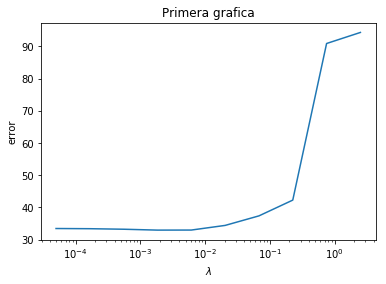

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut 
%matplotlib inline

data = pd.read_csv('Cars93.csv')
X = data[['MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Passengers','Length','Wheelbase', 'Width', 'Turn.circle', 'Weight']].values
Y = data['Price'].values.reshape(-1,1)

loo = LeaveOneOut()
loo.get_n_splits(X)


N=10
l=5*np.logspace(-5,-0.3,N) ##lambda
co=[]
for i in l:
    linear = sklearn.linear_model.Lasso(i,normalize=True)
    er=[]
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        linear.fit(X_train,Y_train)
        er.append(mean_squared_error(linear.predict(X_test), Y_test))
    med=np.mean(np.asarray(er))
    co.append(med)

coef=np.asarray(co)
mp=coef[np.argmin(coef)]
print('El mejor coeficiente fue:',mp)
plt.semilogx(l,co)
plt.ylabel('error')
plt.title('Primera grafica')
plt.xlabel(r'$\lambda$')
        
        
    



Text(0.5, 0, '$\\lambda$')

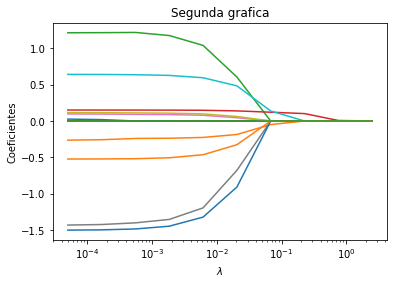

In [2]:
cop=[]
for i in l:
    linear = sklearn.linear_model.Lasso(i,normalize=True)
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        linear.fit(X_train,Y_train)
    cop.append(linear.coef_)
    
 
plt.semilogx(l,cop)
plt.ylabel('Coeficientes')
plt.title('Segunda grafica')
plt.xlabel(r'$\lambda$')